In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder


import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

# 전처리

## 날짜 데이터 전처리

In [3]:
def process_date(df):
    df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d")
    df['년'] = df['일자'].dt.year
    df['월'] = df['일자'].dt.month
    df['일'] = df['일자'].dt.day
    #df = df.drop('일자', axis=1)
    return df

In [55]:
# General preprocessing
train = process_date(train)
day_encoder = LabelEncoder()
train['요일'] = day_encoder.fit_transform(train['요일'])

test = process_date(test)
day_encoder = LabelEncoder()
test['요일'] = day_encoder.fit_transform(test['요일'])

## 식사가능자

In [6]:
train['식사가능자'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

## 전주 식계

In [7]:
from datetime import timedelta
train['전주중식계'] = 0
train['전주석식계'] = 0
idx = pd.DatetimeIndex(train['일자']) + timedelta(weeks=-1)
for i in range(len(train)):
    try:
        train['전주중식계'][i] = train[train['일자'] == str(idx[i])[:10]]['중식계']
        train['전주석식계'][i] = train[train['일자'] == str(idx[i])[:10]]['석식계']
    except:
        train['전주중식계'][i] = train.iloc[i,:]['중식계']
        train['전주석식계'][i] = train.iloc[i,:]['석식계']

train[['중식계', '전주중식계', '석식계', '전주석식계', '일자']].head(10)

,중식계,전주중식계,석식계,전주석식계,일자
0,1039.0,1039,331.0,331,2016-02-01
1,867.0,867,560.0,560,2016-02-02
2,1017.0,1017,573.0,573,2016-02-03
3,978.0,978,525.0,525,2016-02-04
4,925.0,925,330.0,330,2016-02-05
5,1045.0,978,550.0,525,2016-02-11
6,909.0,925,598.0,330,2016-02-12
7,1268.0,1268,672.0,672,2016-02-15
8,1014.0,1014,523.0,523,2016-02-16
9,916.0,916,588.0,588,2016-02-17


## 요일 평균 식계

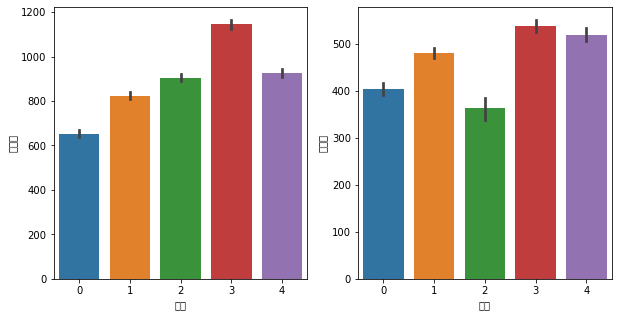

In [8]:
# 중식계와 석식계의 요일별 시각화
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='요일', y='중식계', data=train, ax=ax[0])
sns.barplot(x='요일', y='석식계', data=train, ax=ax[1])

In [9]:
train['요일평균중식계'] = 0
tmp = train.groupby('요일').mean()['중식계'].values
for i in range(len(tmp)):
    train['요일평균중식계'][train['요일'] == i] = tmp[i]

In [10]:
train['요일평균석식계'] = 0
tmp = train.groupby('요일').mean()['석식계'].values
for i in range(len(tmp)):
    train['요일평균석식계'][train['요일'] == i] = tmp[i]

## 월 평균 식계

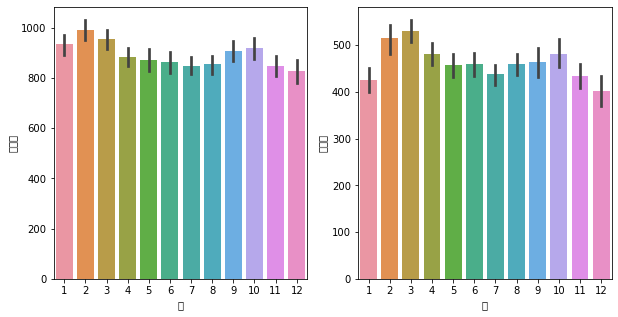

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='월', y='중식계', data=train, ax=ax[0])
sns.barplot(x='월', y='석식계', data=train, ax=ax[1])

In [12]:
train['월평균중식계'] = 0
tmp = train.groupby('월').mean()['중식계']
tmp_k = tmp.keys(); tmp_v = tmp.values 
for i in tmp_k:
    train['월평균중식계'][train['월'] == i] = tmp_v[i-1]

In [13]:
train['월평균석식계'] = 0
tmp = train.groupby('월').mean()['석식계']
tmp_k = tmp.keys(); tmp_v = tmp.values
for i in tmp_k:
    train['월평균석식계'][train['월'] == i] = tmp_v[i-1]

## 공휴일 전후

In [14]:
#공휴일 지정 노가다
train['공휴일전후'] = 0

train['공휴일전후'][17] = 1
train['공휴일전후'][3] = 1
train['공휴일전후'][62] = 1
# train['공휴일전후'][67] = 1
# train['공휴일전후'][82] = 1
train['공휴일전후'][131] = 1
# train['공휴일전후'][130] = 1
train['공휴일전후'][152] = 1
train['공휴일전후'][226] = 1
train['공휴일전후'][221] = 1
train['공휴일전후'][224] = 1
# train['공휴일전후'][244] = 1
train['공휴일전후'][245] = 1
# train['공휴일전후'][267] = 1
train['공휴일전후'][310] = 1
train['공휴일전후'][311] = 1
train['공휴일전후'][309] = 1
train['공휴일전후'][330] = 1
train['공휴일전후'][379] = 1
train['공휴일전후'][467] = 1
# train['공휴일전후'][469] = 1
train['공휴일전후'][470] = 1
train['공휴일전후'][502] = 1
# train['공휴일전후'][501] = 1
# train['공휴일전후'][511] = 1
train['공휴일전후'][565] = 1
train['공휴일전후'][623] = 1
train['공휴일전후'][651] = 1
# train['공휴일전후'][650] = 1
train['공휴일전후'][705] = 1
# train['공휴일전후'][707] = 1
train['공휴일전후'][709] = 1
# train['공휴일전후'][733] = 1
# train['공휴일전후'][748] = 1
# train['공휴일전후'][792] = 1
train['공휴일전후'][815] = 1
train['공휴일전후'][864] = 1
# train['공휴일전후'][863] = 1
train['공휴일전후'][950] = 1
train['공휴일전후'][951] = 1
train['공휴일전후'][953] = 1
train['공휴일전후'][954] = 1
train['공휴일전후'][955] = 1
train['공휴일전후'][971] = 1
# train['공휴일전후'][970] = 1
# train['공휴일전후'][1037] = 1
train['공휴일전후'][1038] = 1
train['공휴일전후'][1099] = 1
train['공휴일전후'][1129] = 1
# train['공휴일전후'][1128] = 1
train['공휴일전후'][1187] = 1
# train['공휴일전후'][1186] = 1

## 자기계발의 날

In [15]:
train['자기계발의날'] = 0
train['자기계발의날'].loc[(train['석식계'] == 0) & (train['공휴일전후'] == 0) & (train['요일'] == 2)] = 1

## Test 전처리

In [17]:
test['식사가능자'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

In [18]:
def make_dow_avg(df_test, df_prev):
    dow_avg_ln = df_prev.groupby('요일').mean()['중식계']
    dow_avg_dn = df_prev.groupby('요일').mean()['석식계']
    
    df_test['요일평균중식계'] = 0
    tmp = dow_avg_ln.values
    for i in range(len(tmp)):
        df_test['요일평균중식계'][df_test['요일'] == i] = tmp[i]
        
    df_test['요일평균석식계'] = 0
    tmp = dow_avg_dn.values
    for i in range(len(tmp)):
        df_test['요일평균석식계'][df_test['요일'] == i] = tmp[i]
    
    return df_test

def make_month_avg(df_test, df_prev):
    month_avg_ln = df_prev.groupby('월').mean()['중식계']
    month_avg_dn = df_prev.groupby('월').mean()['석식계']
    
    df_test['월평균중식계'] = 0
    tmp = month_avg_ln
    tmp_k = tmp.keys(); tmp_v = tmp.values
    for i in tmp_k:
        df_test['월평균중식계'][df_test['월'] == i] = tmp_v[i-1]
        
    df_test['월평균석식계'] = 0
    tmp = month_avg_dn
    tmp_k = tmp.keys(); tmp_v = tmp.values
    for i in tmp_k:
        df_test['월평균석식계'][df_test['월'] == i] = tmp_v[i-1]
        
    return df_test

In [19]:
test['공휴일전후'] = 0
test['공휴일전후'][10] =1
test['공휴일전후'][20] = 1

# 모델링

## 첫 주 예측

In [20]:
submission_df = pd.read_csv('./data/sample_submission.csv')

In [21]:
res = []
X_test = test[['요일', '본사시간외근무명령서승인건수', '공휴일전후', '월', '일자', '일', '년',
                '본사휴가자수', '본사출장자수', '식사가능자']][:5]

In [22]:
from datetime import timedelta
X_test = make_dow_avg(X_test, train)
X_test = make_month_avg(X_test, train)
X_test['전주중식계'] = 0
X_test['전주석식계'] = 0
index = pd.DatetimeIndex(X_test['일자']) + timedelta(weeks=-1)
for i in range(5):
    X_test['전주중식계'][i] = train[train['일자'] == str(index[i])[:10]]['중식계']
    X_test['전주석식계'][i] = train[train['일자'] == str(index[i])[:10]]['석식계']

### 첫 주 중식계

In [23]:
from pycaret.regression import *

In [24]:
X_train_ln = train[['요일', '본사시간외근무명령서승인건수', '전주중식계', '요일평균중식계', '월평균중식계', '공휴일전후',
                '본사휴가자수', '본사출장자수', '식사가능자', '중식계']]

In [25]:
reg = setup(session_id=1,
            data=X_train_ln,
            target='중식계',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,1
1,Target,중식계
2,Original Data,"(1205, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 9)"


In [26]:
gbr_l = tune_model(create_model('gbr', criterion='mae'), optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,86.6267,12939.5845,113.7523,0.7391,0.1457,0.1064
1,76.8172,11350.8083,106.5402,0.6712,0.1160,0.0844
2,68.4497,7940.3722,89.1088,0.8113,0.1112,0.0844
3,63.5584,7271.1523,85.2711,0.8461,0.1137,0.0840
4,60.8818,6037.2814,77.6999,0.8470,0.0889,0.0690
5,66.9411,8834.0936,93.9899,0.8046,0.1207,0.0820
6,79.9812,12151.9195,110.2357,0.7261,0.1230,0.0910
7,69.6723,6911.6484,83.1363,0.7891,0.0950,0.0796
8,70.6252,8554.4768,92.4904,0.8243,0.1031,0.0815
9,75.2832,10298.1315,101.4797,0.8096,0.1411,0.0984


In [27]:
pred_holdouts = predict_model(gbr_l)
final_model_l = finalize_model(gbr_l)
final_model_l

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,68.6112,8724.3538,93.4042,0.7982,0.1186,0.0862


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=260,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
pred_ln = predict_model(final_model_l, X_test[['요일', '본사시간외근무명령서승인건수', '전주중식계', '요일평균중식계', '월평균중식계', '공휴일전후','본사휴가자수', '본사출장자수', '식사가능자']])

In [29]:
submission_df['중식계'][:5] = pred_ln['Label']

### 첫 주 석식계

In [30]:
X_train_dn = train[['요일', '본사시간외근무명령서승인건수', '전주석식계', '요일평균석식계', '월평균석식계', '공휴일전후',
                '본사휴가자수', '본사출장자수', '식사가능자', '석식계']]

In [31]:
reg = setup(session_id=2,
            data=X_train_dn,
            target='석식계',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,2
1,Target,석식계
2,Original Data,"(1205, 10)"
3,Missing Values,False
4,Numeric Features,8
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 9)"


In [32]:
top5 = compare_models(n_select=5, sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,65.7527,9779.1934,98.4694,0.4593,1.0490,0.1300,0.1210
gbr,Gradient Boosting Regressor,67.4196,9758.0785,98.3852,0.4737,1.0490,0.1336,0.0520
rf,Random Forest Regressor,67.8890,10171.9109,100.3835,0.4529,1.0558,0.1336,0.1620
lightgbm,Light Gradient Boosting Machine,68.3402,9897.7071,99.0129,0.4657,1.0423,0.1364,0.1860
huber,Huber Regressor,68.4629,11123.1949,104.7760,0.4129,1.0796,0.1328,0.0130
knn,K Neighbors Regressor,68.9342,10299.4313,101.0676,0.4431,1.0374,0.1437,0.0100
lr,Linear Regression,71.3721,10718.9469,103.1204,0.4249,1.0639,0.1402,0.0140
lar,Least Angle Regression,71.3721,10718.9469,103.1204,0.4249,1.0639,0.1402,0.0120
lasso,Lasso Regression,71.3804,10749.8617,103.2173,0.4271,1.0666,0.1405,0.0130
ridge,Ridge Regression,71.3869,10703.8862,103.0389,0.4266,1.0639,0.1403,0.0110


In [33]:
blended_d = blend_models(top5, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,68.6926,11572.6647,107.5763,0.4775,1.3090,0.1380
1,61.7370,8246.5505,90.8105,0.2356,0.2357,0.1397
2,65.2713,10959.0671,104.6856,0.4438,1.1425,0.1112
3,62.1993,7140.5571,84.5018,0.5488,0.8825,0.1335
4,61.5136,8389.3193,91.5932,0.5350,0.9351,0.1240
5,59.9944,7850.0261,88.6004,0.4829,0.9169,0.1180
6,66.7828,9403.9501,96.9740,0.5888,1.2537,0.1289
7,58.1295,7005.7412,83.7003,0.6364,1.0576,0.1165
8,65.0960,9314.2908,96.5106,0.5546,1.0970,0.1248
9,68.7404,12530.9139,111.9416,0.5243,1.6852,0.1008


In [34]:
pred_holdouts = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
final_model_d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,65.6649,9905.9579,99.5287,0.4903,1.1255,0.1299


VotingRegressor(estimators=[('et',
                             ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                  

In [35]:
pred_dn = predict_model(final_model_d, X_test[['요일', '본사시간외근무명령서승인건수', '전주석식계', '요일평균석식계', '월평균석식계', '공휴일전후','본사휴가자수', '본사출장자수', '식사가능자']])

In [36]:
submission_df['석식계'][:5] = pred_dn['Label']

## 나머지 주 예측

In [37]:
res = []
X_test = test[['일자', '요일', '본사시간외근무명령서승인건수', '공휴일전후', '본사출장자수', '본사휴가자수',
                 '식사가능자', '월', '일']]
X_test["중식계"] = 0
for i in range(len(X_test)):
    if i%5 == 0:
        res.append(X_test[i:i+5])

In [38]:
res = res[1:]

### 나머지 주 중식계

In [39]:
X_train_ln = train[['요일', '본사시간외근무명령서승인건수', '요일평균중식계', '월평균중식계', '공휴일전후',
                '본사휴가자수', '본사출장자수', '식사가능자', '중식계']]

In [40]:
reg = setup(session_id=1,
            data=X_train_ln,
            target='중식계',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,1
1,Target,중식계
2,Original Data,"(1205, 9)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 8)"


In [41]:
gbr_l = tune_model(create_model('gbr', criterion='mae'), optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,88.2032,12982.7689,113.9420,0.7382,0.1474,0.1094
1,80.3566,11920.3707,109.1805,0.6547,0.1200,0.0891
2,68.2929,8090.0987,89.9450,0.8078,0.1117,0.0847
3,60.3972,7058.8055,84.0167,0.8506,0.1159,0.0816
4,64.0567,6465.8144,80.4103,0.8362,0.0913,0.0720
5,68.2430,9116.7156,95.4815,0.7983,0.1236,0.0846
6,75.8343,11310.7795,106.3521,0.7450,0.1206,0.0872
7,68.4871,7074.2636,84.1086,0.7842,0.0983,0.0789
8,74.9977,9656.0099,98.2650,0.8016,0.1162,0.0887
9,68.7857,9265.1812,96.2558,0.8287,0.1389,0.0923


In [42]:
pred_holdouts = predict_model(gbr_l)
final_model_l = finalize_model(gbr_l)
final_model_l

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,67.0850,8308.6040,91.1515,0.8078,0.1133,0.0832


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='mae', init=None,
                          learning_rate=0.05, loss='ls', max_depth=4,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.05, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=4,
                          min_weight_fraction_leaf=0.0, n_estimators=260,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
from datetime import timedelta
prev = train
for idx, part_test in enumerate(res):
    part_test = make_dow_avg(part_test, prev)
    part_test = make_month_avg(part_test, prev)
    
    pred_ln = predict_model(final_model_l, part_test.drop(['일자', '월'], axis=1))
    
    submission_df['중식계'][5*(idx+1):5*(idx+1)+5] = pred_ln['Label']

### 나머지주 석식계

In [44]:
X_train_dn = train[['요일', '본사시간외근무명령서승인건수', '공휴일전후', '요일평균석식계', '월평균석식계', '본사출장자수',
                 '식사가능자', '월', '일', '석식계']]

In [45]:
reg = setup(session_id=2,
            data=X_train_dn,
            target='석식계',
            #numeric_imputation = 'mean',
            normalize = True,
            #categorical_features=['월', '요일', '공휴일전후'],
            silent=True)

,Description,Value
0,session_id,2
1,Target,석식계
2,Original Data,"(1205, 10)"
3,Missing Values,False
4,Numeric Features,7
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(843, 20)"


In [46]:
top5 = compare_models(n_select=5, sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,60.2753,7577.3243,86.6597,0.5941,0.8691,0.1336,0.1330
et,Extra Trees Regressor,61.6159,8126.7232,89.6149,0.5514,0.8887,0.1323,0.1280
xgboost,Extreme Gradient Boosting,62.9686,7824.8812,88.0024,0.5673,0.8209,0.1406,0.3570
gbr,Gradient Boosting Regressor,63.2405,7646.7061,87.1954,0.5837,0.9193,0.1376,0.0440
lightgbm,Light Gradient Boosting Machine,63.3927,7671.3098,87.2022,0.5848,0.8890,0.1413,0.0930
knn,K Neighbors Regressor,71.5468,9953.2297,99.5114,0.4593,0.9952,0.1579,0.0170
huber,Huber Regressor,72.0928,11569.1897,107.0676,0.3740,1.0768,0.1437,0.0250
par,Passive Aggressive Regressor,72.4431,11631.9137,107.3042,0.3725,1.0757,0.1457,0.0240
lasso,Lasso Regression,74.7104,11006.9206,104.6367,0.4036,1.0567,0.1521,0.0100
lr,Linear Regression,75.4023,11105.2649,105.1452,0.3936,1.0527,0.1532,0.0120


In [47]:
blended_d = blend_models(top5, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,62.9659,10164.0796,100.8171,0.5411,1.1499,0.1475
1,61.6410,7203.6935,84.8746,0.3323,0.2001,0.1424
2,61.1963,7495.9168,86.5790,0.6196,0.9882,0.1166
3,57.9512,6156.7309,78.4648,0.6110,0.5347,0.1298
4,55.8952,6771.6111,82.2898,0.6246,0.8578,0.1209
5,52.3359,5142.6730,71.7124,0.6612,0.7336,0.1112
6,61.7380,6114.8694,78.1976,0.7326,0.9950,0.1456
7,57.6448,5627.8607,75.0191,0.7079,0.9018,0.1304
8,64.2281,7601.2306,87.1850,0.6365,0.8932,0.1539
9,59.5791,8412.4633,91.7195,0.6807,1.5546,0.1061


In [48]:
pred_holdouts = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
final_model_d

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,62.3633,8296.5687,91.0855,0.5732,0.9760,0.1416


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                          

In [49]:
from datetime import timedelta
prev = train
for idx, part_test in enumerate(res):
    part_test = make_dow_avg(part_test, prev)
    part_test = make_month_avg(part_test, prev)
    
    pred_dn = predict_model(final_model_d, part_test.drop(['일자'], axis=1))
    
    submission_df['석식계'][5*(idx+1):5*(idx+1)+5] = pred_dn['Label']

## 모델 분석

> 모델 분석
- 중식: 중식계같은 경우 대부분 고르게 분포한 것처럼 보이지만 residual의 값이 양수로 치우쳐져 있는 것을 확인할 수 있습니다. 이에 따라 저희는 Model에서 얻은 최종 값에 먼저 내림을 통해 소수점을 모두 제거해준 뒤, 30을 추가로 더해 오차의 분포를 줄였습니다.
- 석식: 석식계같은 경우는 대부분 고르게 분포한 것처럼 보이지만 residual의 값이 음수로 치우쳐져 있는 것을 확인할 수 있습니다. 이에 따라 저희는 Model에서 얻은 최종 값에 먼저 내림을 통해 소수점을 모두 제거해준 뒤, 30을 추가로 빼주어 오차의 분포를 줄였습니다.

In [52]:
submission_df["중식계"] = submission_df["중식계"] // 1 + 30

In [53]:
submission_df["석식계"] = submission_df["석식계"] // 1 - 30

In [54]:
submission_df.to_csv("./submission.csv", index=False)